In [1]:
import sys
import numba
import swifter
import timeit
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

__author__ = 'HK Dambanemuya'
__version__ = 'Python 2'

'''
    Analysis originaly performed in Python 2 (deprecated)
    Seaborn, Statsmodel, and * imports broken in Python 3
'''

/Users/henrydambanemuya/Library/Python/2.7/lib/python/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


'\n    Analysis originaly performed in Python 2 (deprecated)\n    Seaborn, Statsmodel, and * imports broken in Python 3\n'

In [2]:
borrower_1 = pd.read_csv("../Data/borrower_listing_fe/borrower_listing_fe_25k.csv")
borrower_2 = pd.read_csv("../Data/borrower_listing_fe/borrower_listing_fe_50k.csv")
borrower_3 = pd.read_csv("../Data/borrower_listing_fe/borrower_listing_fe_75k.csv")
borrower_4 = pd.read_csv("../Data/borrower_listing_fe/borrower_listing_fe_100k.csv")
borrower_5 = pd.read_csv("../Data/borrower_listing_fe/borrower_listing_fe_128k.csv")

In [3]:
borrower_frames = [borrower_1, borrower_2, borrower_3, borrower_4, borrower_5]

In [4]:
data = pd.concat(borrower_frames)
data['Listing_Key'] = data.ListingKey
data = data[['Listing_Key', 'ListingKey', 'BorrowerCompletedListings', 'BorrowerRepaidListings', 'BorrowerTotalListings']]
data["BorrowerListingSuccessRate"] = data['BorrowerCompletedListings'] / data['BorrowerTotalListings']
data["BorrowerRepaymentSuccessRate"] = data['BorrowerRepaidListings'] / data['BorrowerCompletedListings']
data.head()

,Listing_Key,ListingKey,BorrowerCompletedListings,BorrowerRepaidListings,BorrowerTotalListings,BorrowerListingSuccessRate,BorrowerRepaymentSuccessRate
0,00003383856420083050622,00003383856420083050622,0,0,0,nan,nan
1,000034085359462718B9059,000034085359462718B9059,0,0,3,0.000,nan
2,000034203787284229CBEF1,000034203787284229CBEF1,0,0,0,nan,nan
3,00003423466422120D65CA3,00003423466422120D65CA3,0,0,1,0.000,nan
4,00003468952897947CDC3A8,00003468952897947CDC3A8,0,0,0,nan,nan


In [5]:
del borrower_1
del borrower_2
del borrower_3
del borrower_4
del borrower_5
del borrower_frames

## Mean

In [6]:
f_avg = {'ListingKey': ['max'],
         'BorrowerCompletedListings': ['mean'],
         'BorrowerRepaidListings': ['mean'],
         'BorrowerTotalListings': ['mean'],
         'BorrowerListingSuccessRate': ['mean'],
         'BorrowerRepaymentSuccessRate': ['mean']
}
borrower_mean_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_avg).as_matrix())
borrower_mean_attr = borrower_mean_attr.rename(index=str, columns={0: "BorrowerAvgRepaidListings", 
                                                             1: "BorrowerAvgTotalListings",
                                                             2: "BorrowerAvgCompletedListings",
                                                             3: "BorrowerAvgListingSuccessRate",
                                                             4: "BorrowerAvgRepaymentSuccessRate",
                                                             5: "ListingKey"})
borrower_mean_attr.head()

,BorrowerAvgRepaidListings,BorrowerAvgTotalListings,BorrowerAvgCompletedListings,BorrowerAvgListingSuccessRate,BorrowerAvgRepaymentSuccessRate,ListingKey
0,0,0,0,NaN,NaN,00003383856420083050622
1,0,0,0,NaN,NaN,00003405662222292C12B86
2,0,3,0,0.000,NaN,000034085359462718B9059
3,0,0,0,NaN,NaN,000034203787284229CBEF1
4,0,1,0,0.000,NaN,00003423466422120D65CA3


## Median

In [7]:
# f_median = {'ListingKey': ['max'],
#          'BorrowerCompletedListings': ['median'],
#          'BorrowerRepaidListings': ['median'],
#          'BorrowerTotalListings': ['median'],
#          'BorrowerListingSuccessRate': ['median'],
#          'BorrowerRepaymentSuccessRate': ['median']
# }
# borrower_median_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_median).as_matrix())
# borrower_median_attr = borrower_median_attr.rename(index=str, columns={0: "BorrowerMedianRepaidListings", 
#                                                                  1: "BorrowerMedianTotalListings",
#                                                                  2: "BorrowerMedianCompletedListings",
#                                                                  3: "BorrowerMedianListingSuccessRate",
#                                                                  4: "BorrowerMedianRepaymentSuccessRate",
#                                                                  5: "ListingKey"})
# borrower_median_attr.head()

In [8]:
# np.mean(data[data["ListingKey"]=="00003383856420083050622"].groupby(["Listing_Key"]).agg(f_avg))

## Standard Deviation

In [9]:
# f_std = {'ListingKey': ['max'],
#          'BorrowerCompletedListings': ['std'],
#          'BorrowerRepaidListings': ['std'],
#          'BorrowerTotalListings': ['std'],
#          'BorrowerListingSuccessRate': ['std'],
#          'BorrowerRepaymentSuccessRate': ['std']
# }

# borrower_std_attr = pd.DataFrame(data.groupby(["Listing_Key"]).agg(f_std).as_matrix())
# borrower_std_attr = borrower_std_attr.rename(index=str, columns={0: "BorrowerStdRepaidListings", 
#                                                              1: "BorrowerStdTotalListings",
#                                                              2: "BorrowerStdCompletedListings",
#                                                              3: "BorrowerStdListingSuccessRate",
#                                                              4: "BorrowerStdRepaymentSuccessRate",
#                                                              5: "ListingKey"})
# borrower_std_attr.head()

## Merge Listing Feature DataFrames

In [10]:
# Prepare final data
final_borrower_data = borrower_mean_attr
# final_borrower_data = final_borrower_data.merge(borrower_median_attr, on="ListingKey")
# final_borrower_data = final_borrower_data.merge(borrower_std_attr, on="ListingKey")
final_borrower_data["BorrowerExperience"] = (final_borrower_data.BorrowerAvgListingSuccessRate*1) + (final_borrower_data.BorrowerAvgRepaymentSuccessRate*2)
final_borrower_data = final_borrower_data[["ListingKey", "BorrowerExperience"]]
final_borrower_data.head()

,ListingKey,BorrowerExperience
0,00003383856420083050622,NaN
1,00003405662222292C12B86,NaN
2,000034085359462718B9059,NaN
3,000034203787284229CBEF1,NaN
4,00003423466422120D65CA3,NaN


## Import Class Variable

In [11]:
listing_data = pd.read_csv("../Data/ProjectLevelData.txt", sep="|")
listing_data = listing_data.loc[(listing_data['RepaidOrNot']==True) | (listing_data['RepaidOrNot']==False)]
listing_data = listing_data[["ListingKey", "RepaidOrNot"]]
listing_data.head()

,ListingKey,RepaidOrNot
17,00033425227988088FA6752,True
21,000433785890431972B4743,False
38,00083422661625108817246,True
46,000A34209897973969CFA81,True
56,000D3410451511356B08F17,True


## Merge Features and Class Variable

In [12]:
# del data

In [13]:
final_data = final_borrower_data.merge(listing_data, on="ListingKey")
final_data['RepaidOrNot'] = final_data['RepaidOrNot'].astype(int)
final_data = final_data.fillna(0)
final_data.head()

,ListingKey,BorrowerExperience,RepaidOrNot
0,00033425227988088FA6752,0.000,1
1,000433785890431972B4743,0.000,0
2,00083422661625108817246,0.000,1
3,000A34209897973969CFA81,0.000,1
4,000D3410451511356B08F17,0.000,1


## Check Feature Correlation

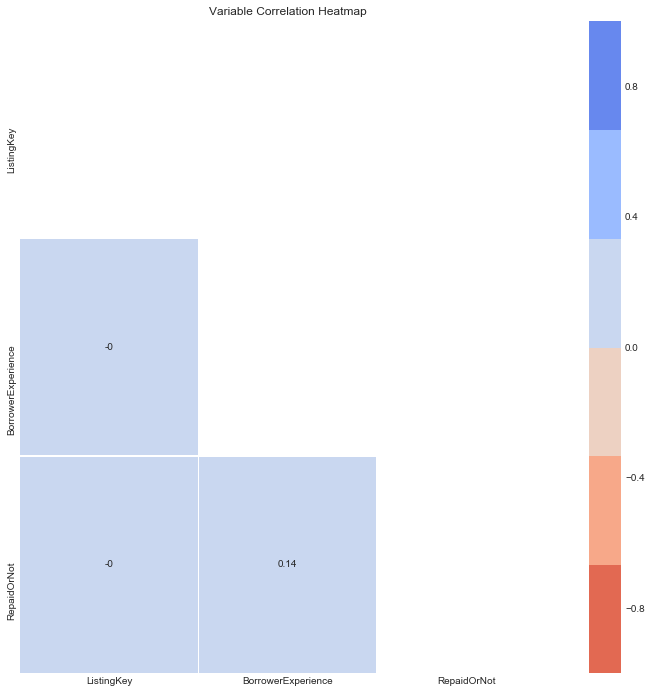

In [14]:
corr = final_data.swifter.apply(pd.to_numeric, errors='coerce').corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.color_palette("coolwarm_r"),
        mask = mask,
        linewidths=.5,
        vmin=-1,
        vmax=1,
        annot=True)
plt.title("Variable Correlation Heatmap")
plt.show()

## Save Data to CSV

In [15]:
## Save data to csv file
# final_lender_data.to_csv("../Data/lender_listing_attr_filtered.csv", index=False)
final_borrower_data = final_borrower_data.fillna(0)
final_borrower_data.to_csv("../Data/borrower_listing_attr.csv", index=False)

In [16]:
final_borrower_data.head()

,ListingKey,BorrowerExperience
0,00003383856420083050622,0.000
1,00003405662222292C12B86,0.000
2,000034085359462718B9059,0.000
3,000034203787284229CBEF1,0.000
4,00003423466422120D65CA3,0.000
